In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
train_data = pd.read_csv('train_data.csv', index_col=0)
test_data = pd.read_csv('test_data.csv', index_col=0)
test_data

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0
125,7.2,3.2,6.0,1.8,2
36,5.5,3.5,1.3,0.2,0
141,6.9,3.1,5.1,2.3,2
12,4.8,3.0,1.4,0.1,0
63,6.1,2.9,4.7,1.4,1


In [4]:
y_train, y_test = train_data.species, test_data.species
X_train, X_test = train_data.drop(['species'], axis=1), test_data.drop(['species'], axis=1)

C:\Users\merku\AppData\Local\Temp\ipykernel_15548\3923946831.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(


<Axes: xlabel='depth_value', ylabel='score'>

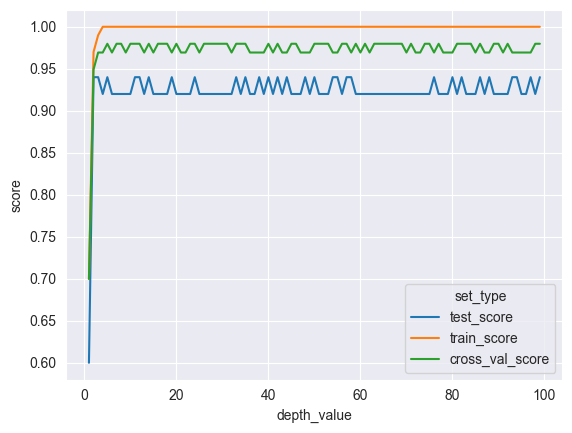

In [5]:
np.random.seed(0)
results = pd.DataFrame(columns=['depth_value', "train_score", "test_score", "cross_val_score"])
for depth_value in range(1, 100):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_value)
    mean_cross_val_score = cross_val_score(model, X_train, y_train, cv=6).mean()
    model.fit(X_train, y_train)
    results = pd.concat(
        [results, pd.DataFrame({"depth_value": [depth_value], "train_score": [model.score(X_train, y_train)],
                                "test_score": [model.score(X_test, y_test)],
                                "cross_val_score": [mean_cross_val_score]})])
results_long = pd.melt(frame=results, id_vars=['depth_value'],
                       value_vars=['test_score', 'train_score', 'cross_val_score'],
                       var_name='set_type', value_name='score')
# results_long
sns.lineplot(data=results_long, x='depth_value', y='score', hue="set_type")

In [11]:
pd.Series(cross_val_predict(model, X_train, y_train, cv=7)).value_counts()

0    35
2    34
1    31
Name: count, dtype: int64